In [39]:
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mask_functions import rle2mask
import utils, data_generator, train_util, models, loss_util, pred_util
from glob import glob
import pydicom
from keras.models import load_model
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import warnings
import keras.backend as K     
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
fold = '1'
output_ch = 1
input_shape = (256, 256, 3)
target_shape = input_shape[:2]
img_ch = input_shape[-1]
aug=True
flip=False
maxshift=[0, 20, 20] # z, x, y
maxrotate=10
train_gen = data_generator.DataGenerator(batch_size=32,
                                             mode='train',
                                             img_ch=img_ch,
                                             data_path='/data/pneumo/fold/[!'+fold+']/',
                                             target_shape=target_shape,
                                             output_ch=output_ch,
                                             aug=aug, flip=flip,
                                             maxshift=maxshift, maxrotate=maxrotate)
val_gen = data_generator.DataGenerator(batch_size=32,
                                             mode='train',
                                             img_ch=img_ch,
                                             data_path='/data/pneumo/fold/[!'+fold+']/',
                                             target_shape=target_shape,
                                             output_ch=output_ch,
                                             aug=aug, flip=flip,
                                             maxshift=maxshift, maxrotate=maxrotate)
# train_gen = datagenerator.generate(train=True)
# val_gen = datagenerator.generate(train=False)
zero_weight=0.1
one_weight=0.9

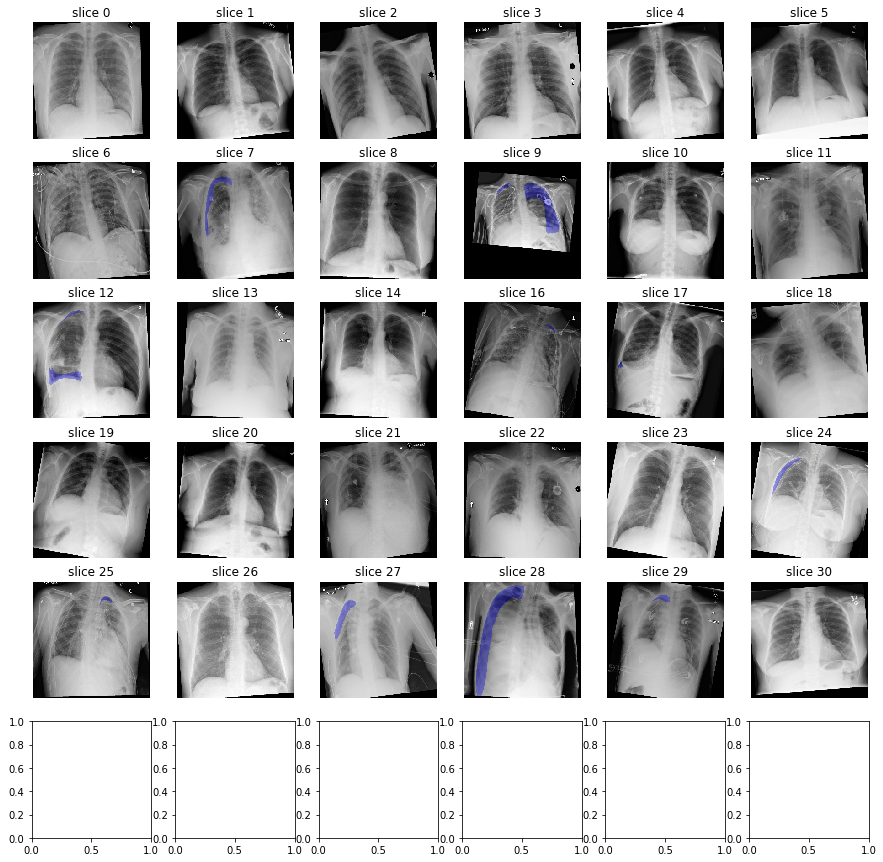

In [41]:
v, m = train_gen.__getitem__(3)
if img_ch == 3:
    v = v[:, :, :, 0]
# v = np.squeeze(v)
# m = np.argmax(m, axis=-1)
utils.vis_slices(v, m)


In [6]:
model_path = '/data/pneumo_log/val_1//2019_0805_0344/best_weights.hdf5'
model = pred_util._load_model(model_path)


Instructions for updating:
Shapes are always computed; don't use the compute_shapes as it has no effect.


In [11]:
images, masks = val_gen.__getitem__(3)
pred = model.predict(images)

for index in range(0, 16):
    print(index)
    i = np.squeeze(images[index])
    m = np.squeeze(masks[index])
    p = np.squeeze(pred[index])
    print(np.unique(p))

    masks_ = masks[index]
    masks_ = np.expand_dims(masks_, axis=0)
    pred_ = pred[index]
    pred_ = np.expand_dims(pred_, axis=0)
    y_true = K.variable(masks_)
    y_pred = K.variable(pred_)
    # y_true = K.variable(masks)
    # y_pred = K.variable(pred)
    dice_flat = loss_util.dice_coef_flat(y_true, y_pred)
    dice_loss_flat = loss_util.dice_loss_flat(y_true, y_pred)
    dice_coef = loss_util.create_dice_coef()
    dice_value = dice_coef(y_true, y_pred)
    bc =loss_util.binary_crossentropy(y_true, y_pred)
    loss = loss_util.bce_dice_loss(y_true, y_pred)
    print('dice_flat(w thresh):', K.get_value(dice_flat))
    print('dice_loss_flat(without thresh)', K.get_value(dice_loss_flat))
    print('bc:', np.mean(K.get_value(bc)))
    print('dice_value(without threshold):', K.get_value(dice_value))
    print('loss:', (np.mean(K.get_value(loss))))

# print('loss:', K.get_value(loss))
# loss = K.get_value(loss)


0
[2.2738431e-09 2.2747280e-09 2.4584699e-09 ... 9.1639056e-04 9.2113687e-04
 9.9277578e-04]
dice_flat(w thresh): nan
dice_loss_flat(without thresh) 0.37238896
bc: 9.062142e-06
dice_value(without threshold): 0.62761104
loss: 0.37239802
1
[2.2443365e-09 2.3958235e-09 2.4350983e-09 ... 5.0967943e-04 5.5447622e-04
 5.6568044e-04]
dice_flat(w thresh): nan
dice_loss_flat(without thresh) 0.30516636
bc: 6.710803e-06
dice_value(without threshold): 0.69483364
loss: 0.30517307
2
[8.7841752e-09 8.8626342e-09 9.0288523e-09 ... 2.8176673e-03 2.8432140e-03
 2.8650695e-03]
dice_flat(w thresh): nan
dice_loss_flat(without thresh) 0.39982384
bc: 1.0174417e-05
dice_value(without threshold): 0.60017616
loss: 0.39983404
3
[3.5486740e-09 3.6193697e-09 3.7026009e-09 ... 7.5341994e-04 7.9960458e-04
 8.1693422e-04]
dice_flat(w thresh): nan
dice_loss_flat(without thresh) 0.33992636
bc: 7.86469e-06
dice_value(without threshold): 0.66007364
loss: 0.3399342
4
[9.9837838e-12 1.5185837e-11 1.6067427e-11 ... 3.811730

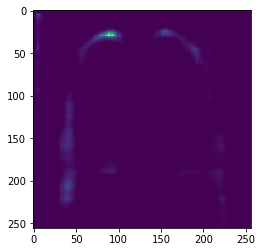

In [8]:
plt.imshow(p)

In [42]:
m =np.squeeze(m[12])

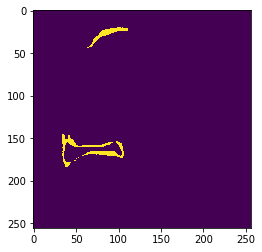

In [28]:
plt.imshow(np.where(m==1, 1, 0))

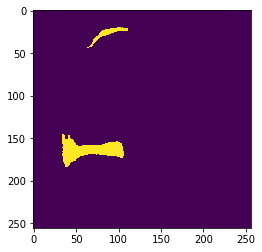

In [43]:
plt.imshow(m)

In [44]:
np.unique(m)

array([0, 1], dtype=uint8)

In [158]:
index = 12
i = np.squeeze(images[index])
m = np.squeeze(masks[index])
p = np.squeeze(pred[index])
print(np.unique(p))

masks_ = masks[index]
masks_ = np.expand_dims(masks_, axis=0)
pred_ = pred[index]
pred_ = np.expand_dims(pred_, axis=0)
y_true = K.variable(masks_)
y_pred = K.variable(pred_)
# y_true = K.variable(masks)
# y_pred = K.variable(pred)
dice_flat = loss_util.dice_coef_flat(y_true, y_pred)
dice_loss_flat = loss_util.dice_loss_flat(y_true, y_pred)
dice_coef = loss_util.create_dice_coef()
dice_value = dice_coef(y_true, y_pred)
bc =binary_crossentropy(y_true, y_pred)
loss = loss_util.bce_dice_loss(y_true, y_pred)
print('dice_flat(w thresh):', K.get_value(dice_flat))
print('dice_loss_flat(without thresh)', K.get_value(dice_loss_flat))
print('bc:', np.mean(K.get_value(bc)))
print('dice_value(without threshold):', K.get_value(dice_value))
print('loss:', (np.mean(K.get_value(loss))))

# print('loss:', K.get_value(loss))
# loss = K.get_value(loss)


[3.0309319e-10 3.1216318e-10 3.7241801e-10 ... 9.9999976e-01 9.9999988e-01
 1.0000000e+00]
dice_flat(w thresh): 1.9485854
dice_loss_flat(without thresh) -0.9480845
bc: -40.30897
dice_value(without threshold): 1.9480845
loss: -41.25705


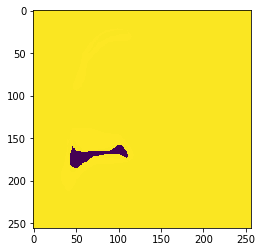

In [163]:
plt.imshow(np.squeeze(K.get_value(loss)))

In [164]:
K.get_value(loss)

array([[[-0.94808435, -0.9480843 , -0.94808424, ..., -0.9480842 ,
         -0.94808424, -0.9480843 ],
        [-0.94808424, -0.94808364, -0.94808215, ..., -0.9480822 ,
         -0.94808316, -0.94808406],
        [-0.94808394, -0.94808036, -0.94807464, ..., -0.9480706 ,
         -0.9480792 , -0.9480836 ],
        ...,
        [-0.9480837 , -0.94807523, -0.9480528 , ..., -0.9480014 ,
         -0.94806767, -0.948083  ],
        [-0.9480838 , -0.9480789 , -0.9480687 , ..., -0.94805473,
         -0.9480771 , -0.9480836 ],
        [-0.9480842 , -0.94808376, -0.94808316, ..., -0.94808257,
         -0.94808376, -0.94808424]]], dtype=float32)

In [161]:
loss.shape

TensorShape([Dimension(1), Dimension(256), Dimension(256)])

In [139]:
y_true_f = K.flatten(y_true)
y_pred_f = K.flatten(y_pred)

In [102]:
intersection = y_true_f * y_pred_f

In [105]:
K.get_value(K.sum(K.get_value(intersection)))

0.0

In [108]:
n = K.get_value(K.sum(y_true_f) + K.sum(y_pred_f))

In [119]:
1/(n+1)

0.34277771124035306